In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
dataset=pd.read_csv("https://raw.githubusercontent.com/ShiaiSkywalker/assignment-grp-5/main/Car%20Price.csv")

In [71]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [72]:
dataset.shape

(205, 26)

In [73]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [75]:
dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [76]:
dataset.drop('car_ID',axis=1,inplace=True)

In [77]:
numeric_features= list(dataset.select_dtypes(include=['int64','float64']).keys())

In [78]:
dataset[numeric_features].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [79]:
descrete_features=[feature for feature in numeric_features if len(dataset[feature].unique())<25]
dataset[descrete_features].head()

,symboling,peakrpm
0,3,5000
1,3,5000
2,1,5000
3,2,5500
4,2,5500


In [80]:
continous_features=[feature for feature in numeric_features if feature not in descrete_features]
dataset[continous_features].head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,18,22,17450.0


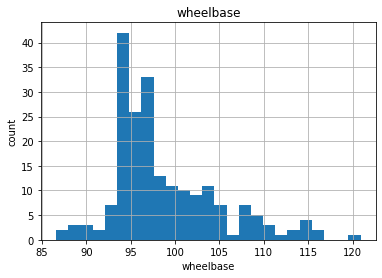

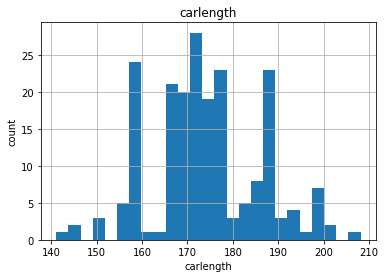

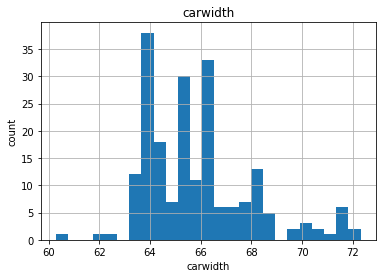

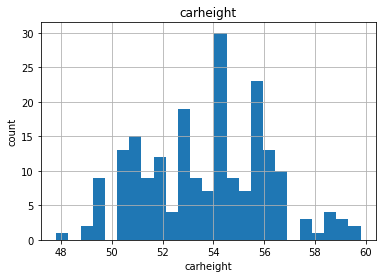

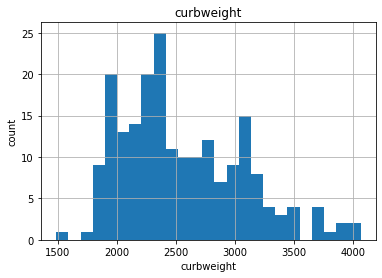

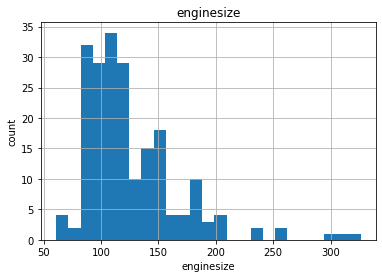

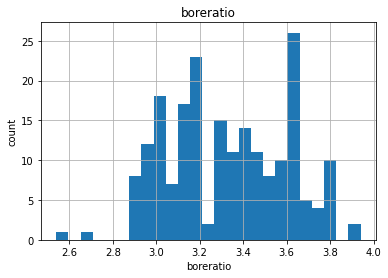

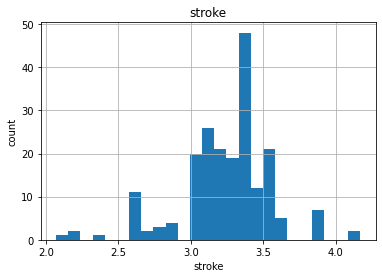

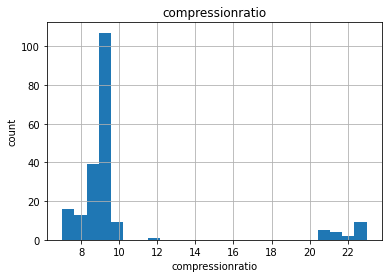

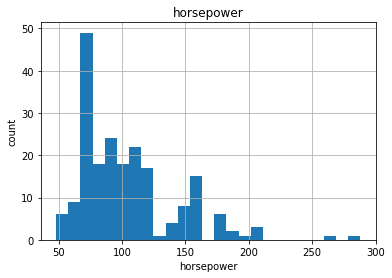

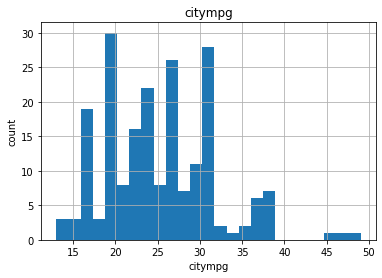

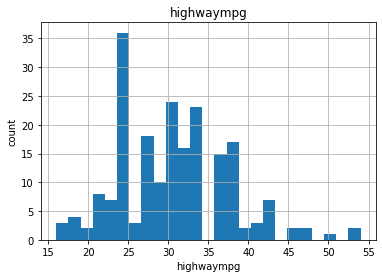

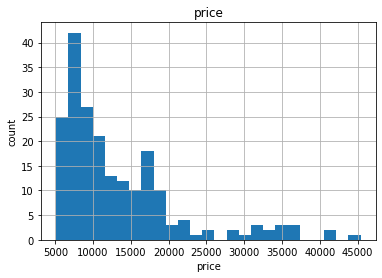

In [81]:
for feature in continous_features:
    df=dataset.copy()
    df[feature].hist(bins=25)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

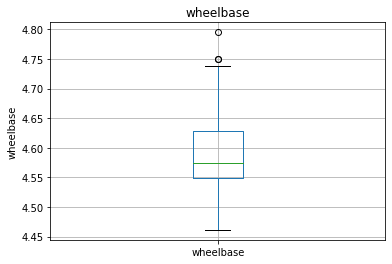

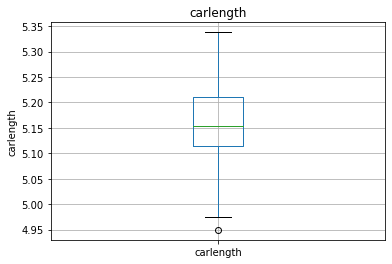

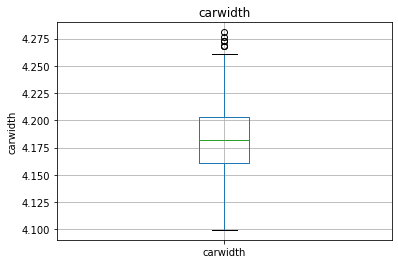

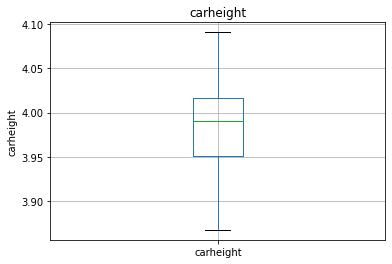

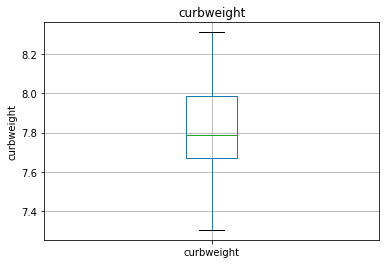

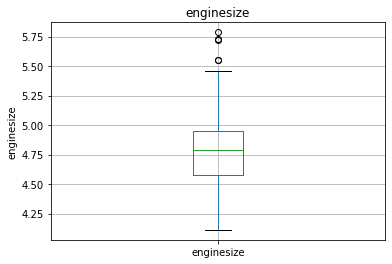

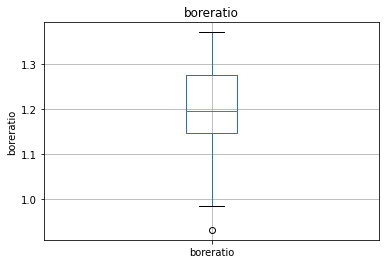

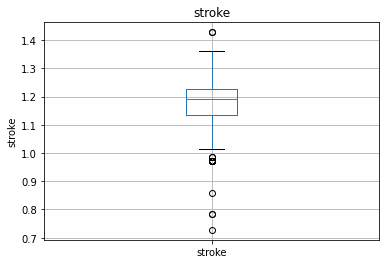

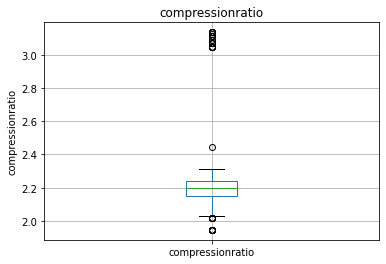

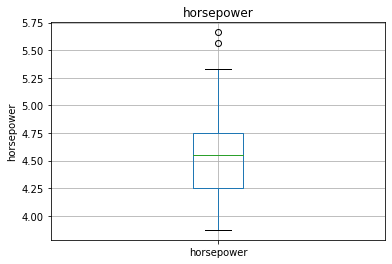

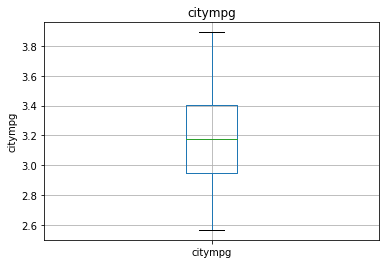

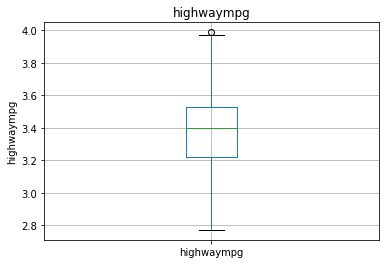

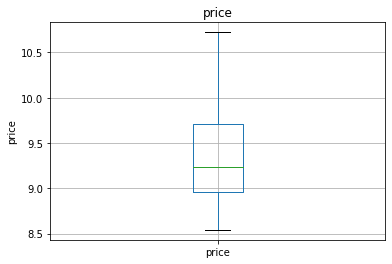

In [82]:
for feature in continous_features:
    df=dataset.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.title(feature)
        plt.ylabel(feature)
        plt.show()

In [83]:
Q1 = dataset.price.quantile(0.25)
Q3 = dataset.price.quantile(0.75)
Q1, Q3

(7788.0, 16503.0)

In [84]:
IQR = Q3 - Q1
IQR

8715.0

In [85]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-5284.5, 29575.5)

In [86]:
dataset[(dataset.price<lower_limit)|(dataset.price>upper_limit)]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
15,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
16,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
17,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
47,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
70,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
71,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
72,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
73,0,buick century special,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0


In [87]:
dataset_no_outlier = dataset[(dataset.price>lower_limit)&(dataset.price<upper_limit)]
dataset_no_outlier

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [88]:
dataset.shape

(205, 25)

In [89]:
dataset_no_outlier.shape

(190, 25)

In [90]:
dataset['zscore'] = ( dataset_no_outlier.price - dataset_no_outlier.price.mean() ) / dataset_no_outlier.price.std()
dataset.zscore

0      0.399642
1      1.004459
2      1.004459
3      0.491220
4      1.195666
         ...   
200    1.073897
201    1.516692
202    2.007791
203    2.206042
204    2.237239
Name: zscore, Length: 205, dtype: float64

In [91]:
dataset[dataset['zscore']>3]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,zscore
68,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,58.7,3750,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28248.0,3.368982
69,0,buick century,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28176.0,3.354490


In [92]:
dataset[dataset['zscore']<-3]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,zscore


In [93]:
dataset[(dataset.zscore<-3) | (dataset.zscore>3)]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,zscore
68,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,58.7,3750,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28248.0,3.368982
69,0,buick century,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28176.0,3.354490


In [94]:
dataset_no_outliers = dataset[(dataset.zscore>-3) & (dataset.zscore<3)]

In [95]:
dataset.shape

(205, 26)

In [96]:
dataset_no_outliers.shape

(188, 26)

In [99]:
df = pd.read_csv("https://raw.githubusercontent.com/ShiaiSkywalker/assignment-grp-5/main/Car%20Price.csv")

In [100]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [101]:
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [102]:
df['CarName'] = df['CarName'].apply(lambda x : x.split(' ')[0])
car_dic = {'maxda':'mazda','porsche':'porcshce','toyouta':'toyota','vw':'vokswagen','volkswagen':'vokswagen'}
df['CarName'] = df['CarName'].replace(car_dic)

In [103]:
df.head()
cyl_dic = {'four':4,'six':6,'five':5,'twelve':12,'two':2,'eight':8}
df['cylindernumber'] = df['cylindernumber'].map(cyl_dic)
df['doornumber'] = df['doornumber'].map(cyl_dic)

In [104]:
z= []
for x in df.columns:
    if type(df[x][0]) ==str:
        z.append(x)

In [105]:
df.drop(['car_ID'],inplace = True,axis =1)

In [106]:
num_col = [x for x in df.columns if x not in z]

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[num_col] = scaler.fit_transform(df[num_col])

In [108]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [109]:
dum = pd.get_dummies(df[z],drop_first=True)
df = pd.concat([df,dum],axis = 1)

In [110]:
col_ = [x for x in df.columns if x not in z]
df = df[col_]
x = df.copy()
x.drop('price',axis =1,inplace = True)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
model = sm.OLS(y_train,x_train).fit()

In [113]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:               OLS              Adj. R-squared:     0.949    
Dependent Variable:  price            AIC:                -567.0723
Date:                2021-08-29 18:30 BIC:                -383.8209
No. Observations:    184              Log-Likelihood:     340.54   
Df Model:            56               F-statistic:        61.58    
Df Residuals:        127              Prob (F-statistic): 2.84e-70 
R-squared:           0.964            Scale:              0.0020941
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
symboling           -0.0256   0.0348 -0.7375 0.4622 -0.0945  0.0432
doornumber           0.0015   0.0139  0.1059 0.9158 -0.0260  0.0289
wheelbase            0.1808   0.0876  2.0637 0.0411  0.0074  0.3542
carlength           -0.1432   0.0921 -1.5546 0.1225 -0.3256  0.0391
carwidth             0.1682   0.0767  2.1944 0.0300  0.0165  0.3199
carheight           -0.0813   0.0451 -1.8034 0.0737 -0.1705  0.0079
curbweight           0.2950   0.1073  2.7487 0.0069  0.0826  0.5074
cylindernumber      -0.0423   0.1655 -0.2552 0.7990 -0.3698  0.2853
enginesize           0.8051   0.1665  4.8347 0.0000  0.4756  1.1346
boreratio           -0.1296   0.0532 -2.4358 0.0162 -0.2349 -0.0243
stroke              -0.0549   0.0491 -1.1188 0.2653 -0.1521  0.0422
compressionratio    -0.3127   0.1832 -1.7067 0.0903 -0.6752  0.0499
horsepower          -0.0994   0.1353 -0.7348 0.4638 -0.3672  0.1683
peakrpm              0.1434   0.0419  3.4231 0.0008  0.0605  0.2263
citympg              0.0647   0.1349  0.4798 0.6322 -0.2022  0.3317
highwaympg           0.0736   0.1203  0.6119 0.5417 -0.1645  0.3118
CarName_alfa-romero  0.0866   0.0635  1.3643 0.1749 -0.0390  0.2122
CarName_audi         0.0828   0.0588  1.4077 0.1617 -0.0336  0.1991
CarName_bmw          0.2602   0.0578  4.5032 0.0000  0.1459  0.3746
CarName_buick        0.1589   0.0648  2.4515 0.0156  0.0306  0.2871
CarName_chevrolet   -0.0303   0.0612 -0.4951 0.6214 -0.1514  0.0908
CarName_dodge       -0.0381   0.0528 -0.7209 0.4723 -0.1426  0.0664
CarName_honda        0.0436   0.0590  0.7395 0.4610 -0.0731  0.1604
CarName_isuzu        0.0204   0.0599  0.3410 0.7337 -0.0981  0.1390
CarName_jaguar       0.0400   0.0724  0.5515 0.5823 -0.1034  0.1833
CarName_mazda        0.0307   0.0504  0.6097 0.5432 -0.0690  0.1305
CarName_mercury      0.0538   0.0752  0.7165 0.4750 -0.0949  0.2026
CarName_mitsubishi  -0.0453   0.0532 -0.8526 0.3955 -0.1506  0.0599
CarName_nissan       0.0140   0.0491  0.2847 0.7763 -0.0833  0.1112
CarName_peugeot     -0.0036   0.0325 -0.1107 0.9120 -0.0679  0.0607
CarName_plymouth    -0.0394   0.0531 -0.7429 0.4589 -0.1445  0.0656
CarName_porcshce     0.2283   0.0756  3.0179 0.0031  0.0786  0.3780
CarName_renault     -0.0007   0.0709 -0.0094 0.9925 -0.1409  0.1396
CarName_saab         0.1398   0.0612  2.2847 0.0240  0.0187  0.2609
CarName_subaru      -0.0422   0.0465 -0.9080 0.3656 -0.1343  0.0498
CarName_toyota       0.0164   0.0505  0.3237 0.7467 -0.0836  0.1163
CarName_vokswagen    0.0428   0.0521  0.8204 0.4135 -0.0604  0.1459
CarName_volvo        0.0669   0.0583  1.1466 0.2537 -0.0485  0.1823
fueltype_gas        -0.0957   0.1200 -0.7977 0.4265 -0.3332  0.1417
aspiration_turbo     0.0625   0.0214  2.9135 0.0042  0.0200  0.1049
carbody_hardtop     -0.0717   0.0313 -2.2857 0.0239 -0.1337 -0.0096
carbody_hatchback   -0.0969   0.0286 -3.3838 0.0010 -0.1536 -0.0402
carbody_sedan       -0.0823   0.0311 -2.6461 0.0092 -0.1438 -0.0207
carbody_wagon       -0.0861   0.0341 -2.5267 0.0127 -0.1535 -0.0187
drivewheel_fwd       0.0058   0.0250  0.2306 0.8180 -0.0437  0.0552
drivewheel_rwd       0.0074   0.0317  0.2318 0.8171 -0.0555  0.0702
enginelocation_rear  0.12

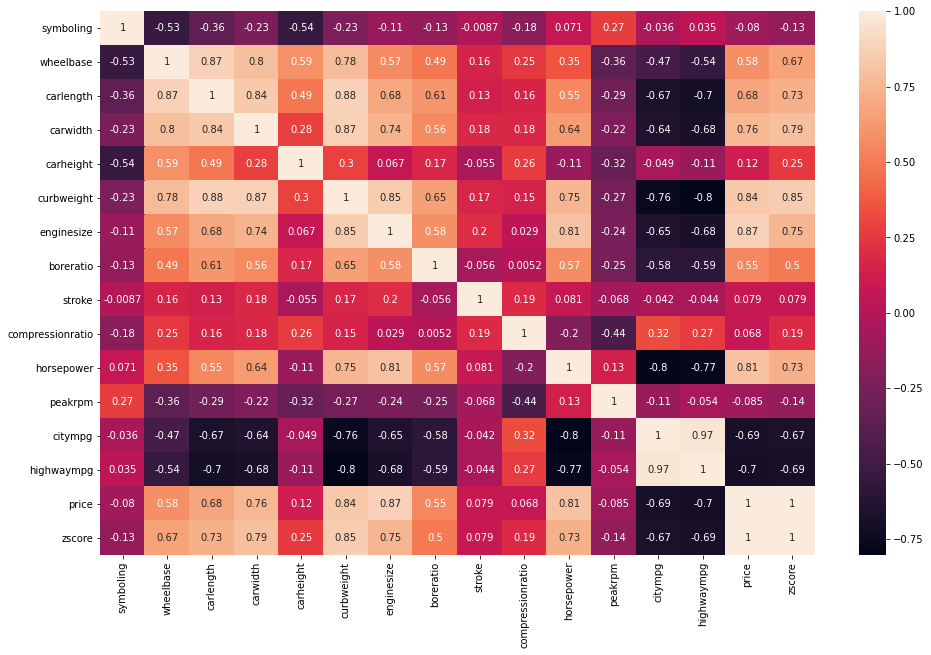

In [115]:
plt.figure(figsize=(16,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()